In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [ ]:
trips_csv = pd.read_csv("/content/veer_trips.csv",error_bad_lines=False, engine="python")
pt_csv = pd.read_csv("/content/veer_PT.csv") 
tc_csv = pd.read_csv("/content/veer_TC (1).csv") 
status_csv = pd.read_csv("/content/veer_trips_status.csv") 

In [ ]:
tc_copy = tc_csv 
pt_copy = pt_csv 

In [ ]:
pt_csv.sort_values("id",axis = 0, ascending = True,na_position ='last',inplace = True)
tc_csv.sort_values("id",axis = 0, ascending = True,na_position ='last',inplace = True) 

In [ ]:
index_names = tc_csv[ tc_csv.customer_total == 21400.0].index

tc_csv.drop(index_names, inplace = True)

In [ ]:
pt_csv.head(3) 

,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id,order_id,is_refund
0,2065,0q0f3ven,114.33,2019-10-03 14:01:47,USD,dHJhbnNhY3Rpb25fMHEwZjN2ZW4,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:01:48,6890513333,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jcXEzMnJk,US,NaN,NaN,cqq32rd,485af5a63d6cc8ca10e5a55c0228f889,10458.0,4634.0,843-117-974,False
1,2066,4tdbndgy,114.33,2019-10-03 14:51:32,USD,dHJhbnNhY3Rpb25fNHRkYm5kZ3k,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:51:33,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4636.0,458-075-690,False
2,2067,jmnkr95j,114.33,2019-10-03 14:55:58,USD,dHJhbnNhY3Rpb25fam1ua3I5NWo,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:55:59,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4637.0,NaN,False


In [ ]:
tc_csv.head(3)

,id,trip_id,trip_order_id,service_rate_id,is_custom_pricing,created_date,updated_date,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,affiliate_fee,affiliate_processing_fee,affiliate_payout,driver_tip_price,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,phone_booking_fee,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price
5,4533,4629,3673,736.0,False,2019-10-03 13:25:33,NaN,$137.54,$0.00,$0.00,$0.00,$0.00,$146.27,$125.03,$12.51,$4.37,$120.66,0,$0.00,$0.00,$0.00,$0.00,"{""base_rate"": {""tax"": 8.73, ""cost"": 137.54, ""t...",13065.0,0,$0.00,False
6,4534,4630,3674,1569.0,False,2019-10-03 13:27:16,NaN,$107.50,$0.00,$0.00,$0.00,$0.00,$114.33,$97.72,$9.78,$3.42,$94.30,0,$0.00,$0.00,$0.00,$0.00,"{""base_rate"": {""tax"": 6.83, ""cost"": 107.5, ""to...",13065.0,0,$0.00,False
7,4535,4631,3675,1569.0,False,2019-10-03 13:30:23,NaN,$107.50,$0.00,$0.00,$0.00,$0.00,$114.33,$97.72,$9.78,$3.42,$94.30,0,$0.00,$0.00,$0.00,$0.00,"{""base_rate"": {""tax"": 6.83, ""cost"": 107.5, ""to...",13065.0,0,$0.00,False


In [ ]:
# affiliate_payout =  affiliate_trip_price + affiliate_extra_stops_price + affiliate_addons_price + affiliate_gratuity_price - affiliate_processing_fee
# customer_total = customer_trip_price + extra_stops_price + addons_price	 + gratuity_price	+ customer_booking_fee + tax 
# Profit = affiliate_fee 
# Profit = customer_total - affiliate_payout - tax - affiliate_processing_fee 
#            Or 
# Profit = ( customer_trip_price + extra_stops_price + addons_price	 + gratuity_price	+ customer_booking_fee )- affiliate_payout - affiliate_processing_fee

In [ ]:
print(tc_csv["id"].max(),tc_csv["id"].min()) 
print(pt_csv["id"].max(),pt_csv["id"].min()) 

16493 4533
12728 2065


In [ ]:
tc_csv['affiliate_fee'] = tc_csv['affiliate_fee'].str.replace('$',"")
tc_csv['affiliate_fee'] = tc_csv['affiliate_fee'].str.replace(',',"")
tc_csv['affiliate_fee'] = tc_csv['affiliate_fee'].astype(str).astype(float)
tc_csv["affiliate_fee"].sum()

287945.18000000005

In [ ]:
index_names = tc_csv[ tc_csv.customer_total == 21400.0].index
tc_csv.drop(index_names, inplace = True) 
tc_csv["affiliate_fee"].sum() 

287945.18000000005

In [ ]:
final_csv = pd.merge(pt_csv,tc_csv,left_on='id',right_on='id',how='left') 

In [ ]:
final_csv.head(3) 

,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id_x,order_id,is_refund,trip_id_y,trip_order_id,service_rate_id,is_custom_pricing,created_date,updated_date,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,affiliate_fee,affiliate_processing_fee,affiliate_payout,driver_tip_price,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,phone_booking_fee,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price
0,2065,0q0f3ven,114.33,2019-10-03 14:01:47,USD,dHJhbnNhY3Rpb25fMHEwZjN2ZW4,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:01:48,6890513333,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jcXEzMnJk,US,NaN,NaN,cqq32rd,485af5a63d6cc8ca10e5a55c0228f889,10458.0,4634.0,843-117-974,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2066,4tdbndgy,114.33,2019-10-03 14:51:32,USD,dHJhbnNhY3Rpb25fNHRkYm5kZ3k,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:51:33,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4636.0,458-075-690,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2067,jmnkr95j,114.33,2019-10-03 14:55:58,USD,dHJhbnNhY3Rpb25fam1ua3I5NWo,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:55:59,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4637.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_csv["credit_card_type"].loc[final_csv["id"] >= 4533 ]  

2468                 Visa
2469                 Visa
2470     American Express
2471                 Visa
2472             Discover
               ...       
10659                Visa
10660                Visa
10661                Visa
10662                Visa
10663                Visa
Name: credit_card_type, Length: 8196, dtype: object

In [ ]:
final_csv["credit_card_type"].value_counts()

Visa                4649
American Express    3121
MasterCard          2233
None                 482
Discover             179
Name: credit_card_type, dtype: int64

In [ ]:
final_csv.duplicated().any()

False

In [ ]:
final_csv.shape

(10664, 51)

In [ ]:
final_csv.drop(["service_rate_id","created_date","updated_date","phone_booking_fee","trip_order_id","driver_tip_price","driver_tip_price","driver_tip_price"], axis = 1, inplace = True)

In [ ]:
final_csv.rename(columns = {'affiliate_fee' : 'Luxi Profit'}, inplace = True) 

In [ ]:
final_csv.head(3)

,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id_x,order_id,is_refund,trip_id_y,is_custom_pricing,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,Luxi Profit,affiliate_processing_fee,affiliate_payout,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price
0,2065,0q0f3ven,114.33,2019-10-03 14:01:47,USD,dHJhbnNhY3Rpb25fMHEwZjN2ZW4,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:01:48,6890513333,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jcXEzMnJk,US,NaN,NaN,cqq32rd,485af5a63d6cc8ca10e5a55c0228f889,10458.0,4634.0,843-117-974,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2066,4tdbndgy,114.33,2019-10-03 14:51:32,USD,dHJhbnNhY3Rpb25fNHRkYm5kZ3k,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:51:33,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4636.0,458-075-690,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2067,jmnkr95j,114.33,2019-10-03 14:55:58,USD,dHJhbnNhY3Rpb25fam1ua3I5NWo,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:55:59,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4637.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in final_csv[["customer_trip_price","extra_stops_price","addons_price","gratuity_price","customer_booking_fee","customer_total","affiliate_trip_price","affiliate_processing_fee","affiliate_payout","affiliate_extra_stops_price","affiliate_addons_price","affiliate_gratuity_price","trip_protection"]]:
  final_csv[i] = final_csv[i].str.replace('$',"")
  final_csv[i] = final_csv[i].str.replace(',',"")
  final_csv[i] = final_csv[i].astype(str).astype(float)

In [ ]:
final_csv.dtypes

id                               int64
transaction_id                  object
amount                         float64
created_at                      object
currency_iso_code               object
transaction_global_id           object
payment_instrument_type         object
transaction_status              object
transaction_type                object
merchant_account_id             object
updated_at                      object
customer_id                     object
credit_card_type                object
card_expiration_month          float64
card_expiration_year           float64
card_global_id                  object
customer_location               object
card_last4_digits              float64
card_masked_digits             float64
card_token                      object
card_unique_identifier          object
booking_user_id                float64
trip_id_x                      float64
order_id                        object
is_refund                         bool
trip_id_y                

In [ ]:
final_csv["Luxi Profit"].sum()

202524.41999999998

In [ ]:
index_names = final_csv[ final_csv.customer_total == 21400.0].index

final_csv.drop(index_names, inplace = True) 

In [ ]:
# index_names = final_csv[ final_csv["customer_total"] == 0 ].index
# final_csv.drop(index_names, inplace = True) 

In [ ]:
final_csv["proft_percentage"] = (final_csv["Luxi Profit"] / final_csv["customer_total"])*100  

In [ ]:
result = final_csv.groupby('credit_card_type').agg({'Luxi Profit': ['mean', 'min', 'max','sum','count']}) 
print("Mean, min, and max values of Luxi Profit is :-")
print(result) 

Mean, min, and max values of Luxi Profit is :-
                 Luxi Profit                                
                        mean     min     max       sum count
credit_card_type                                            
American Express   24.921880  -79.29  596.80  61905.95  2484
Discover           24.856757  -13.00   67.86   3678.80   148
MasterCard         24.926400  -70.29  156.05  45764.87  1836
None                     NaN     NaN     NaN      0.00     0
Visa               24.547016 -228.57  755.50  91143.07  3713


In [ ]:
result = final_csv.groupby('credit_card_type').agg({'proft_percentage': ['mean', 'min', 'max']}) 
print("Mean, min, and max values of Profit Percentage is :-")
print(result) 

Mean, min, and max values of Profit Percentage is :-
                 proft_percentage                       
                             mean        min         max
credit_card_type                                        
American Express        13.317481 -70.230169  102.752294
Discover                13.464304  -3.178873   27.257384
MasterCard              13.380917 -35.953964  199.521531
None                          NaN        NaN         NaN
Visa                          inf -62.121542         inf


In [ ]:
final_csv.corr(method = "pearson") 

,id,amount,card_expiration_month,card_expiration_year,card_last4_digits,card_masked_digits,booking_user_id,trip_id_x,is_refund,trip_id_y,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,Luxi Profit,affiliate_processing_fee,affiliate_payout,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,tax_rate_id,early_pick_up_amount,trip_protection,proft_percentage
id,1.000000,-0.043314,NaN,NaN,NaN,NaN,0.868783,0.826836,-0.017289,1.000000,-0.079015,-0.008488,0.084081,0.152353,-0.185619,-0.049434,-0.076887,-0.026058,0.061815,-0.036245,-0.008737,0.083334,0.154614,0.039005,0.115474,0.229864,0.042556
amount,-0.043314,1.000000,NaN,NaN,NaN,NaN,-0.029306,0.054601,-0.087817,-0.020948,-0.003152,-0.002030,-0.008277,-0.006600,0.018540,-0.005315,-0.004510,-0.000059,-0.012792,-0.006446,-0.005376,-0.008847,-0.007186,-0.005069,-0.013007,-0.010770,0.004515
card_expiration_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_expiration_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_last4_digits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_masked_digits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_user_id,0.868783,-0.029306,NaN,NaN,NaN,NaN,1.000000,0.728955,-0.031768,0.752424,-0.059168,-0.001885,0.057291,0.113326,-0.118989,-0.037680,-0.057152,-0.031080,0.035948,-0.027674,0.001115,0.055867,0.115637,0.026851,0.091991,0.174842,0.017115
trip_id_x,0.826836,0.054601,NaN,NaN,NaN,NaN,0.728955,1.000000,-0.267919,0.720791,-0.049494,-0.004238,0.069286,0.112149,-0.124496,-0.026342,-0.050076,-0.018702,0.047628,-0.018394,-0.005335,0.069454,0.112191,0.020372,0.084180,0.172250,0.021721
is_refund,-0.017289,-0.087817,NaN,NaN,NaN,NaN,-0.031768,-0.267919,1.000000,-0.021151,-0.003983,-0.011713,-0.020015,-0.010105,-0.013050,-0.009095,-0.004835,0.003498,-0.001912,-0.007643,-0.014534,-0.019743,-0.010079,-0.002830,-0.004297,-0.024920,0.015399
trip_id_y,1.000000,-0.020948,NaN,NaN,NaN,NaN,0.752424,0.720791,-0.021151,1.000000,-0.079017,-0.008483,0.084085,0.152346,-0.185629,-0.049437,-0.076889,-0.026077,0.061822,-0.036247,-0.008733,0.083337,0.154606,0.039006,0.115482,0.229860,0.042528


In [ ]:
final_csv.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,10663.0,7.396443e+03,3078.714808,2065.000000,4730.500000,7396.000000,10062.500000,12728.00
amount,10663.0,1.815170e+02,185.855599,0.010000,123.610000,161.200000,212.760000,11646.75
card_expiration_month,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_expiration_year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_last4_digits,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_masked_digits,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_user_id,10650.0,1.610050e+04,3370.700433,10211.000000,13448.000000,16132.000000,18988.750000,22087.00
trip_id_x,10653.0,1.034733e+04,4016.968164,0.000000,7415.000000,10696.000000,13668.000000,16602.00
trip_id_y,8184.0,8.731920e+03,2366.180814,4629.000000,6687.750000,8734.500000,10780.250000,12826.00
customer_trip_price,8181.0,1.593179e+02,130.176876,2.270000,107.380000,140.000000,184.870000,6455.60


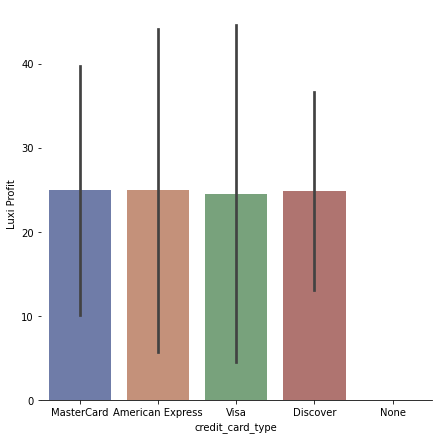

In [ ]:
g = sns.catplot(
    data=final_csv, kind="bar",
    x="credit_card_type", y="Luxi Profit",
    ci="sd", palette="dark", alpha=.6, height=6
) 
g.despine(left=True)   

In [ ]:
final_csv.head(3)

,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id_x,order_id,is_refund,trip_id_y,is_custom_pricing,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,Luxi Profit,affiliate_processing_fee,affiliate_payout,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price,proft_percentage
0,2065,0q0f3ven,114.33,2019-10-03 14:01:47,USD,dHJhbnNhY3Rpb25fMHEwZjN2ZW4,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:01:48,6890513333,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jcXEzMnJk,US,NaN,NaN,cqq32rd,485af5a63d6cc8ca10e5a55c0228f889,10458.0,4634.0,843-117-974,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2066,4tdbndgy,114.33,2019-10-03 14:51:32,USD,dHJhbnNhY3Rpb25fNHRkYm5kZ3k,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:51:33,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4636.0,458-075-690,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2067,jmnkr95j,114.33,2019-10-03 14:55:58,USD,dHJhbnNhY3Rpb25fam1ua3I5NWo,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:55:59,1367328329,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19qN3Y3ZDdq,US,NaN,NaN,j7v7d7j,485af5a63d6cc8ca10e5a55c0228f889,10456.0,4637.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_csv["merchant_account_id"].value_counts() 

OneWayLimocomInc_instant    10102
luxyride                      561
Name: merchant_account_id, dtype: int64

In [ ]:
final_csv.isna().sum()

id                                 0
transaction_id                     0
amount                             0
created_at                         0
currency_iso_code                  0
transaction_global_id              0
payment_instrument_type            0
transaction_status                 0
transaction_type                   0
merchant_account_id                0
updated_at                         0
customer_id                        0
credit_card_type                   0
card_expiration_month          10663
card_expiration_year           10663
card_global_id                     0
customer_location                  0
card_last4_digits              10663
card_masked_digits             10663
card_token                         0
card_unique_identifier             0
booking_user_id                   13
trip_id_x                         10
order_id                          79
is_refund                          0
trip_id_y                       2479
is_custom_pricing               2479
c

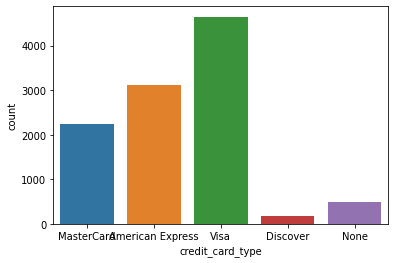

In [ ]:
ax = sns.countplot(x="credit_card_type", data=final_csv) 

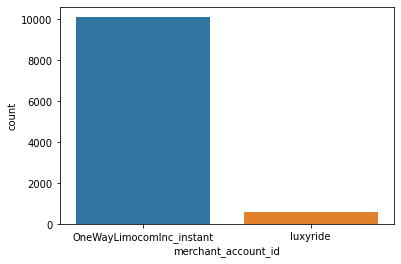

In [ ]:
ax = sns.countplot(x="merchant_account_id", data=final_csv)

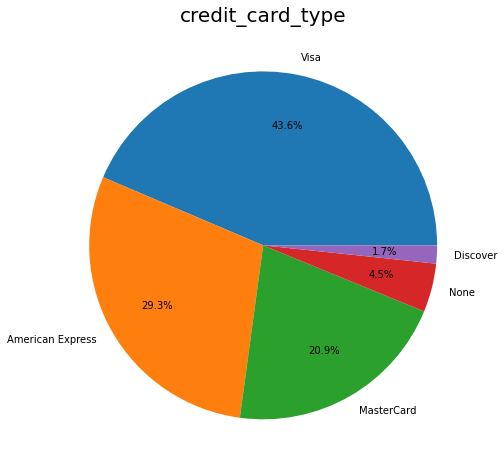

In [ ]:
labels=pt_csv['credit_card_type'].value_counts().index
values=pt_csv['credit_card_type'].value_counts().values
plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,autopct='%.1f%%',
          pctdistance=0.7)
plt.xticks(rotation=45)
plt.title('credit_card_type',color='black',fontsize=20)
plt.show()

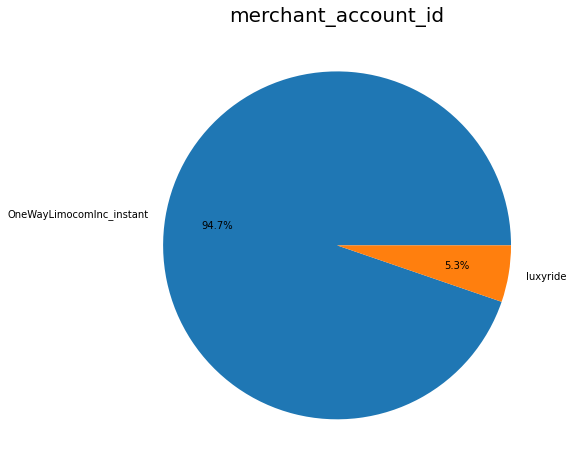

In [ ]:
labels=pt_csv['merchant_account_id'].value_counts().index
values=pt_csv['merchant_account_id'].value_counts().values
plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,autopct='%.1f%%',
          pctdistance=0.7)
plt.xticks(rotation=45)
plt.title('merchant_account_id',color='black',fontsize=20)
plt.show() 

In [ ]:
final_csv["merchant_account_id"].value_counts()

OneWayLimocomInc_instant    10102
luxyride                      561
Name: merchant_account_id, dtype: int64

In [ ]:
# let us try to find how much extra money we an generate if we are able to convert 5% of the one ways to two ways 

result = final_csv.groupby('merchant_account_id').agg({'Luxi Profit': ['mean', 'min', 'max','sum']}) 
print("Mean, min, and max values of Profit  is :-")
print(result)   

Mean, min, and max values of Profit  is :-
                         Luxi Profit                           
                                mean     min     max        sum
merchant_account_id                                            
OneWayLimocomInc_instant   24.783788 -228.57  755.50  200798.25
luxyride                   21.448608   -3.00   57.35    1694.44


In [ ]:
result = final_csv.groupby('merchant_account_id').agg({'customer_total': ['mean', 'min', 'max','sum']}) 
print("Mean, min, and max values of Profit  is :-")
print(result)  

Mean, min, and max values of Profit  is :-
                         customer_total                            
                                   mean    min      max         sum
merchant_account_id                                                
OneWayLimocomInc_instant     190.484754   0.00  6455.60  1543307.48
luxyride                     157.170759  66.23   396.75    12416.49


In [ ]:
trips_csv.head() 

,id,customer_id,trip_status_id,pick_up_address,drop_off_address,total_hours_for_hourly,is_special_event,special_event_type,is_airport_departure,airport_id,flight_number,primary_passenger_name,primary_passenger_mobile_number,primary_passenger_email_address,arrival_time,passenger_notes,created_date,updated_date,is_customer_booking,driver_id,vehicle_id,is_active,affiliate_id,internal_notes,airline_name,created_by_id,is_airport_arrival,trip_type_id,vehicle_type_id,gratuity_id,pick_up_date,trip_sub_status_id,completed_date,trip_duration,trip_miles,trip_meters,trip_minutes,trip_seconds,trip_miles_actual,trip_meters_actual,trip_minutes_actual,trip_seconds_actual,trip_protection,secondary_customer_id,secondary_passenger_name,secondary_passenger_mobile,secondary_passenger_email,corporate_account_id,is_deleted,deleted_by,deleted_date
0,4646,10463.0,12,"{""place"":{""place_type"":""airport"",""airport_code...","{""place"":{""place_type"":""[\""establishment\"",\""p...",0.0,False,0.0,True,NaN,307,Joe Salemme,+1 203 732 6268,+191000056610,NaN,NaN,2019-10-03 16:15:11,2019-10-03 16:15:11,True,10476.0,321.0,True,10023.0,NaN,B6-JetBlue Airways,10463.0,False,1.0,1.0,0.0,2019-10-06 19:00:00,4.0,NaN,NaN,0.000000,0,0,0,0,0,0,0,False,NaN,NaN,+191000056610,NaN,NaN,False,-1,NaN
1,4665,10478.0,13,"{""place"":{""place_type"":[""establishment"",""point...","{""place"":{""place_type"":[""premise""],""airport_co...",1.0,False,0.0,False,NaN,3616,sarah grady,+1 203-816-7419,+191000056610,NaN,NaN,2019-10-06 17:46:09,2019-10-06 17:46:09,True,NaN,NaN,True,NaN,NaN,AA - American Airlines,10478.0,False,2.0,1.0,4.0,2019-10-10 08:30:00,NaN,NaN,NaN,0.000000,0,0,0,0,0,0,0,False,NaN,NaN,+191000056610,NaN,NaN,False,-1,NaN
2,4638,10454.0,7,"{""place"":{""place_type"":[""premise""],""airport_co...","{""place"":{""place_type"":[""establishment"",""food""...",0.0,False,0.0,False,NaN,NaN,nicole marie,+1 475-235-9158,+191000056610,NaN,NaN,2019-10-03 15:02:49,2019-10-03 15:02:49,True,NaN,NaN,True,NaN,NaN,NaN,10454.0,False,2.0,1.0,4.0,2019-10-05 11:02:00,NaN,NaN,NaN,0.000000,0,0,0,0,0,0,0,False,NaN,NaN,+191000056610,NaN,NaN,False,-1,NaN
3,7200,13646.0,12,"{""place"":{""name"":""8009 Cypress Grove Ln"",""plac...","{""place"":{""name"":""Dulles International Airport...",0.0,True,NaN,False,NaN,2154,Kara Cunzeman,7087645984,+191000056610,NaN,Please call/text when you arrive and I will c...,2020-02-07 21:13:45,2020-02-07 21:13:45,True,11790.0,754.0,True,10002.0,NaN,United Airlines,13646.0,True,2.0,1.0,1.0,2020-02-10 06:00:00,4.0,NaN,NaN,21.988462,35387,29,1743,0,0,0,0,False,NaN,NaN,+191000056610,NaN,NaN,False,-1,NaN
4,4639,10447.0,13,"{""place"":{""place_type"":[""premise""],""airport_co...","{""place"":{""place_type"":[""establishment"",""point...",0.0,False,0.0,False,NaN,NaN,William Van Wyck,+1 203-247-3302,+191000056610,NaN,NaN,2019-10-03 15:17:20,2019-10-03 15:17:20,True,NaN,NaN,True,NaN,NaN,NaN,10447.0,False,1.0,1.0,4.0,2019-10-10 11:00:00,NaN,NaN,NaN,0.000000,0,0,0,0,0,0,0,False,NaN,NaN,+191000056610,NaN,NaN,False,-1,NaN


In [ ]:
# final_csv['Cashback'] = np.where( final_csv['credit_card_type'] == 'MasterCard', 0.02*final_csv["customer_total"], 0)
k  = final_csv[ (final_csv['merchant_account_id'] == 'luxyride') ]  
k.isna().sum()
k.dropna(subset=['customer_total'],inplace = True)
k.head()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id_x,order_id,is_refund,trip_id_y,is_custom_pricing,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,Luxi Profit,affiliate_processing_fee,affiliate_payout,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price,proft_percentage
10585,12650,7f58hqv9,137.23,2021-05-12 15:49:37,USD,dHJhbnNhY3Rpb25fN2Y1OGhxdjk,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 15:49:39,508437675,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY185eDkycWM2,US,NaN,NaN,9x92qc6,53866dd9b4a2ac854d31f5519ab5ff5c,22043.0,16528.0,117-782-665,False,12748.0,False,88.00,0.0,0.0,13.20,0.0,101.20,73.11,14.89,3.02,83.29,0.0,0.0,13.20,"{""base_rate"": {""tax"": 0, ""cost"": 88, ""total"": ...",15926.0,0.0,0.0,False,14.713439
10586,12651,dk03vga6,46.11,2021-05-12 15:51:47,USD,dHJhbnNhY3Rpb25fZGswM3ZnYTY,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 15:51:47,508437675,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY185eDkycWM2,US,NaN,NaN,9x92qc6,53866dd9b4a2ac854d31f5519ab5ff5c,22043.0,16528.0,117-782-665,False,12749.0,False,99.75,0.0,0.0,10.65,0.0,118.97,81.80,11.65,2.45,90.00,0.0,0.0,10.65,"{""base_rate"": {""tax"": 4.26, ""cost"": 71, ""total...",33079.0,0.0,0.0,False,9.792385
10587,12652,4w6x8tsg,605.34,2021-05-12 15:59:50,USD,dHJhbnNhY3Rpb25fNHc2eDh0c2c,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 15:59:50,635369205,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jdGNzZng2,US,NaN,NaN,ctcsfx6,53866dd9b4a2ac854d31f5519ab5ff5c,22045.0,16529.0,449-876-493,False,12750.0,False,144.22,0.0,0.0,17.55,0.0,184.23,121.64,19.49,4.03,135.16,0.0,0.0,17.55,"{""base_rate"": {""tax"": 10.38, ""cost"": 117, ""tot...",59877.0,0.0,8.0,False,10.579167
10588,12653,rc2gptmm,50.00,2021-05-12 16:01:05,USD,dHJhbnNhY3Rpb25fcmMyZ3B0bW0,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 16:01:05,635369205,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19iZ3R4NHM2,US,NaN,NaN,bgtx4s6,53866dd9b4a2ac854d31f5519ab5ff5c,22045.0,16529.0,449-876-493,False,12751.0,False,188.00,0.0,0.0,28.20,0.0,216.20,160.67,27.33,6.61,182.26,0.0,0.0,28.20,NaN,37585.0,0.0,0.0,False,12.641073
10589,12654,qn23ddvq,10.00,2021-05-12 16:03:14,USD,dHJhbnNhY3Rpb25fcW4yM2RkdnE,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 16:03:14,635369205,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19iZ3R4NHM2,US,NaN,NaN,bgtx4s6,53866dd9b4a2ac854d31f5519ab5ff5c,22045.0,16529.0,449-876-493,False,12752.0,False,82.38,0.0,0.0,16.48,0.0,98.86,65.90,16.48,2.88,79.49,0.0,0.0,16.48,"{""base_rate"": {""tax"": 0, ""cost"": 82.38, ""total...",6887.0,0.0,0.0,False,16.670038


In [ ]:
k.shape

(79, 46)

In [ ]:
k

,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id_x,order_id,is_refund,trip_id_y,is_custom_pricing,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,Luxi Profit,affiliate_processing_fee,affiliate_payout,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price,proft_percentage
10585,12650,7f58hqv9,137.23,2021-05-12 15:49:37,USD,dHJhbnNhY3Rpb25fN2Y1OGhxdjk,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 15:49:39,508437675,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY185eDkycWM2,US,NaN,NaN,9x92qc6,53866dd9b4a2ac854d31f5519ab5ff5c,22043.0,16528.0,117-782-665,False,12748.0,False,88.00,0.0,0.0,13.20,0.0,101.20,73.11,14.89,3.02,83.29,0.0,0.0,13.20,"{""base_rate"": {""tax"": 0, ""cost"": 88, ""total"": ...",15926.0,0.0,0.0,False,14.713439
10586,12651,dk03vga6,46.11,2021-05-12 15:51:47,USD,dHJhbnNhY3Rpb25fZGswM3ZnYTY,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 15:51:47,508437675,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY185eDkycWM2,US,NaN,NaN,9x92qc6,53866dd9b4a2ac854d31f5519ab5ff5c,22043.0,16528.0,117-782-665,False,12749.0,False,99.75,0.0,0.0,10.65,0.0,118.97,81.80,11.65,2.45,90.00,0.0,0.0,10.65,"{""base_rate"": {""tax"": 4.26, ""cost"": 71, ""total...",33079.0,0.0,0.0,False,9.792385
10587,12652,4w6x8tsg,605.34,2021-05-12 15:59:50,USD,dHJhbnNhY3Rpb25fNHc2eDh0c2c,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 15:59:50,635369205,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jdGNzZng2,US,NaN,NaN,ctcsfx6,53866dd9b4a2ac854d31f5519ab5ff5c,22045.0,16529.0,449-876-493,False,12750.0,False,144.22,0.0,0.0,17.55,0.0,184.23,121.64,19.49,4.03,135.16,0.0,0.0,17.55,"{""base_rate"": {""tax"": 10.38, ""cost"": 117, ""tot...",59877.0,0.0,8.0,False,10.579167
10588,12653,rc2gptmm,50.00,2021-05-12 16:01:05,USD,dHJhbnNhY3Rpb25fcmMyZ3B0bW0,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 16:01:05,635369205,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19iZ3R4NHM2,US,NaN,NaN,bgtx4s6,53866dd9b4a2ac854d31f5519ab5ff5c,22045.0,16529.0,449-876-493,False,12751.0,False,188.00,0.0,0.0,28.20,0.0,216.20,160.67,27.33,6.61,182.26,0.0,0.0,28.20,NaN,37585.0,0.0,0.0,False,12.641073
10589,12654,qn23ddvq,10.00,2021-05-12 16:03:14,USD,dHJhbnNhY3Rpb25fcW4yM2RkdnE,credit_card,submitted_for_settlement,sale,luxyride,2021-05-12 16:03:14,635369205,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19iZ3R4NHM2,US,NaN,NaN,bgtx4s6,53866dd9b4a2ac854d31f5519ab5ff5c,22045.0,16529.0,449-876-493,False,12752.0,False,82.38,0.0,0.0,16.48,0.0,98.86,65.90,16.48,2.88,79.49,0.0,0.0,16.48,"{""base_rate"": {""tax"": 0, ""cost"": 82.38, ""total...",6887.0,0.0,0.0,False,16.670038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,12724,gckwesp6,8.00,2021-05-20 10:12:49,USD,dHJhbnNhY3Rpb25fZ2Nrd2VzcDY,credit_card,submitted_for_settlement,sale,luxyride,2021-05-20 10:12:49,407984592,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY181NmN6eDVn,US,NaN,NaN,56czx5g,53866dd9b4a2ac854d31f5519ab5ff5c,22083.0,16599.0,305-417-224,False,12822.0,False,175.00,0.0,25.0,26.25,0.0,238.25,149.99,25.01,7.04,194.20,0.0,25.0,26.25,"{""base_rate"": {""tax"": 10.5, ""cost"": 175, ""tota...",33740.0,0.0,0.0,False,10.497377
10660,12725,9t3yayy4,24.77,2021-05-20 10:22:35,USD,dHJhbnNhY3Rpb25fOXQzeWF5eTQ,credit_card,submitted_for_settlement,sale,luxyride,2021-05-20 10:22:35,502289838,Visa,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19nbjZ0Mndt,US,NaN,NaN,gn6t2wm,53866dd9b4a2ac854d31f5519ab5ff5c,22056.0,16594.0,254-753-408,False,128

In [ ]:
final_csv['merchant_account_id'].value_counts()

OneWayLimocomInc_instant    10102
luxyride                      561
Name: merchant_account_id, dtype: int64

In [ ]:
final_csv['credit_card_type'].value_counts() 

Visa                4648
American Express    3121
MasterCard          2233
None                 482
Discover             179
Name: credit_card_type, dtype: int64

In [ ]:
#final_csv['merchant_account_id'].where(~(final_csv.customer_total > 396.75), other = 'luxyride', inplace=True) 

In [ ]:
#final_csv['merchant_account_id'].where(~(final_csv.credit_card_type == 'MasterCard'), other = 'luxyride', inplace=True) 

In [ ]:
final_csv['Cashback'] = np.where( final_csv['credit_card_type'] == 'MasterCard', 0.02*final_csv["customer_total"], 0) 

In [ ]:
final_csv['Cashback'].sum() 

7002.3406

In [ ]:
final_csv["new_profit"] = final_csv["Luxi Profit"] - final_csv["Cashback"] 

In [ ]:
k = 0
for i in final_csv['Cashback']:
  if i > 7 :
    k += 1
print((k/final_csv['Cashback'].count())*100)   

0.8766803039158386


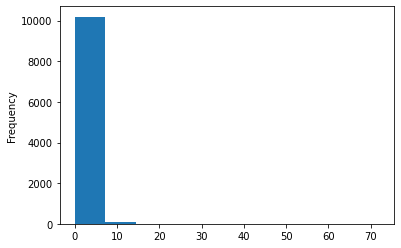

In [ ]:
final_csv['Cashback'].plot(kind="hist") 

In [ ]:
final_csv.head(1) 

,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id_x,order_id,is_refund,trip_id_y,is_custom_pricing,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,Luxi Profit,affiliate_processing_fee,affiliate_payout,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price,proft_percentage,Cashback,new_profit
0,2065,0q0f3ven,114.33,2019-10-03 14:01:47,USD,dHJhbnNhY3Rpb25fMHEwZjN2ZW4,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:01:48,6890513333,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jcXEzMnJk,US,NaN,NaN,cqq32rd,485af5a63d6cc8ca10e5a55c0228f889,10458.0,4634.0,843-117-974,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result = final_csv.groupby('credit_card_type').agg({'Luxi Profit': ['mean', 'min', 'max','sum']}) 
print("Mean, min, and max values of new_profit is :-")
print(result)   

Mean, min, and max values of new_profit is :-
                 Luxi Profit                          
                        mean     min     max       sum
credit_card_type                                      
American Express   24.921880  -79.29  596.80  61905.95
Discover           24.856757  -13.00   67.86   3678.80
MasterCard         24.926400  -70.29  156.05  45764.87
None                     NaN     NaN     NaN      0.00
Visa               24.547016 -228.57  755.50  91143.07


In [ ]:
result = final_csv.groupby('credit_card_type').agg({'new_profit': ['mean', 'min', 'max','sum']}) 
print("Mean, min, and max values of new_profit is :-")
print(result)   

Mean, min, and max values of new_profit is :-
                 new_profit                              
                       mean     min       max         sum
credit_card_type                                         
American Express  24.921880  -79.29  596.8000  61905.9500
Discover          24.856757  -13.00   67.8600   3678.8000
MasterCard        21.112489  -74.20  101.8524  38762.5294
None                    NaN     NaN       NaN      0.0000
Visa              24.547016 -228.57  755.5000  91143.0700


This is the Profit before giving out the cashback 

In [ ]:
profit_after_cashback = final_csv["new_profit"].sum()
customer_total_amnt = final_csv["customer_total"].sum()  
new_profit_percentage = (profit_after_cashback/customer_total_amnt)*100
print("The new profit is ", profit_after_cashback)
print("The new profit percentage is ",new_profit_percentage) 

The new profit is  195490.3494
The new profit percentage is  12.565876284595653


This is the profit after giving out the cashback 

In [ ]:
final_csv["Luxi Profit"].sum(), final_csv["customer_total"].sum()

(202492.69, 1555723.9700000002)

In [ ]:
profit_bfr_cashback = final_csv["Luxi Profit"].sum()
c0ustomer_total_amnt = final_csv["customer_total"].sum()
old_profit_percentage = (profit_bfr_cashback/customer_total_amnt)*100
print("The old profit was ", profit_bfr_cashback)
print("The old profit percentage was ",old_profit_percentage)   

The old profit was  202492.69
The old profit percentage was  13.015978020831035


In [ ]:
#final_csv['new_profit'] = final_csv['new_profit'] + 0.25*(final_csv['gratuity_price']+final_csv['affiliate_processing_fee'] + final_csv['affiliate_trip_price'] + final_csv['affiliate_gratuity_price'] )
#final_csv['new_profit'] = final_csv['new_profit'] + 0.25*(final_csv['affiliate_processing_fee'] + final_csv['gratuity_price']  )
final_csv['final_profit'] = final_csv['new_profit'] + 0.17*( final_csv['gratuity_price'] + final_csv['affiliate_gratuity_price']  )  

After doing the above task of reducing a bit of the gratituty paid to the affiliate we will be able to tremendously boost the Profit.


In [ ]:
final_profit = final_csv["final_profit"].sum() 
c0ustomer_total_amnt = final_csv["customer_total"].sum()
final_profit_percentage = (final_profit/customer_total_amnt)*100
print("The final profit was ", final_profit) 
print("The final profit percentage was ",final_profit_percentage)  

The final profit was  249894.38860000003
The final profit percentage was  16.06290019430632


In [ ]:
(final_csv['gratuity_price'].mean() )*0.18 

3.518756085043993

In [ ]:
(final_csv['affiliate_gratuity_price'].mean())*0.18 

3.519889662756602

In [ ]:
final_csv['affiliate_payout'].mean() 

158.7648942672033

In [ ]:
final_csv['customer_total'].mean() 

190.1630570834863

In [ ]:
final_csv.head(1) 

,id,transaction_id,amount,created_at,currency_iso_code,transaction_global_id,payment_instrument_type,transaction_status,transaction_type,merchant_account_id,updated_at,customer_id,credit_card_type,card_expiration_month,card_expiration_year,card_global_id,customer_location,card_last4_digits,card_masked_digits,card_token,card_unique_identifier,booking_user_id,trip_id_x,order_id,is_refund,trip_id_y,is_custom_pricing,customer_trip_price,extra_stops_price,addons_price,gratuity_price,customer_booking_fee,customer_total,affiliate_trip_price,Luxi Profit,affiliate_processing_fee,affiliate_payout,affiliate_extra_stops_price,affiliate_addons_price,affiliate_gratuity_price,sales_tax,tax_rate_id,early_pick_up_amount,trip_protection,is_affiliate_custom_price,proft_percentage,Cashback,new_profit,final_profit
0,2065,0q0f3ven,114.33,2019-10-03 14:01:47,USD,dHJhbnNhY3Rpb25fMHEwZjN2ZW4,credit_card,submitted_for_settlement,sale,OneWayLimocomInc_instant,2019-10-03 14:01:48,6890513333,MasterCard,NaN,NaN,cGF5bWVudG1ldGhvZF9jY19jcXEzMnJk,US,NaN,NaN,cqq32rd,485af5a63d6cc8ca10e5a55c0228f889,10458.0,4634.0,843-117-974,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result = final_csv.groupby('credit_card_type').agg({'final_profit': ['mean', 'min', 'max','sum']}) 
print("Mean, min, and max values of new_profit is :-")
print(result)  

Mean, min, and max values of new_profit is :-
                 final_profit                                 
                         mean       min       max          sum
credit_card_type                                              
American Express    31.615885  -69.2430  596.8000   78533.8591
Discover            31.755793    0.0000   74.9570    4699.8574
MasterCard          27.829481  -65.5300  109.5024   51094.9278
None                      NaN       NaN       NaN       0.0000
Visa                31.124628 -209.9006  755.5000  115565.7443
